# **Learning Sobel kernel using Machine Learning**



**Sobel kernel in x direction**

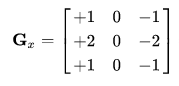


**Sobel kernel y direction**

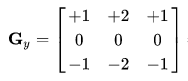

# **Circle Dataset conation cirlces as images and thier labels as after applying Sobel filter on circles.**

torch.Size([5, 1, 256, 256])


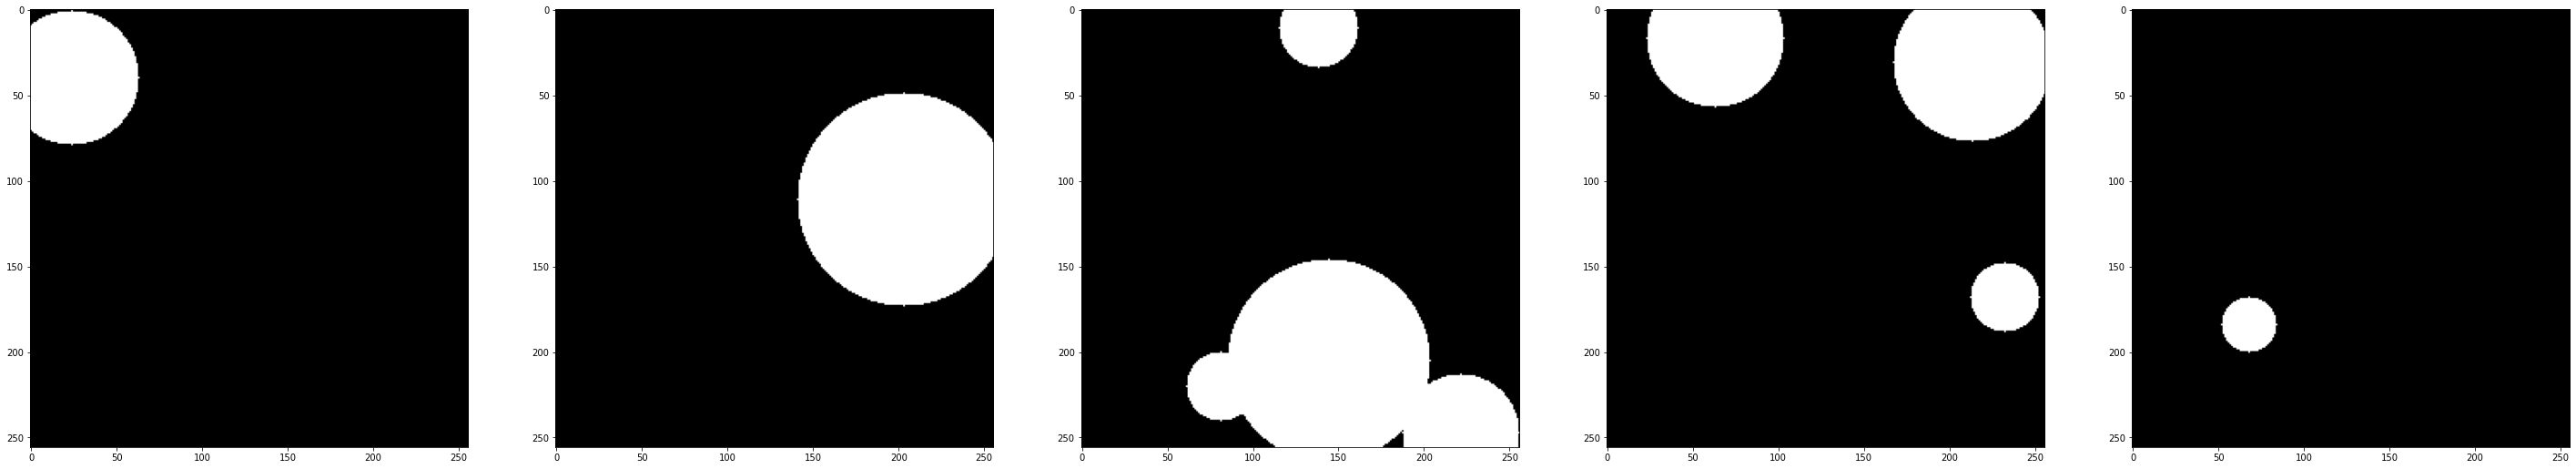

In [165]:
from torch.utils.data import Dataset,DataLoader
import cv2
import numpy as np
import matplotlib.pyplot as plt

class MyDataset(Dataset):
    def __init__(self, img_shape=(256,256),max_radius=64,max_size=1000):
        super().__init__()
        self.img_shape = np.array(img_shape)
        self.max_radius = min(img_shape)//4
        self.max_len=max_size
    
    def __getitem__(self, idx):

        im = np.zeros(self.img_shape,dtype=np.float32)
        for _ in range(np.random.randint(0,5)):
            x,y = np.random.randint(0,self.img_shape[0]),np.random.randint(0,self.img_shape[1])
            radius = np.random.randint(10,self.max_radius)
            im = np.maximum(im,cv2.circle(im,(y,x),radius=radius,color=1,thickness=-1))

        sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=3) 
        return im[None,:,:],sobelx[None,:,:]

    def __len__(self):
        return self.max_len


def show(x):
  plt.figure(figsize=(50,50)) 
  for i in range(x.shape[0]):
    img=x[i,:,:]
    plt.subplot(1,5,i+1)
    plt.imshow(img,cmap='gray')
  plt.show()
  
test_dataset=ToyDataset(max_size=20)
x,y=next(iter(DataLoader(test_dataset,batch_size=5,shuffle=True)))
print(x.shape)
show(x.squeeze(dim=1))

In [166]:
class Sobel_Filter(nn.Module):
  def __init__(self,kernel_size,padding):
    super(Sobel_Filter,self).__init__()
    self.conv=nn.Conv2d(1,1,kernel_size=kernel_size,padding=padding,bias=False)

  def forward(self,x):
    return self.conv(x)
  

In [ ]:
#!pip install -qqqU fastai
from fastai.vision.all import *
from fastai.data.core import DataLoaders
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [187]:

# FastAI dataloader
train_dataset= MyDataset(max_size=400)
val_dataset=MyDataset(max_size=100)
dls = DataLoaders.from_dsets(train_dataset, val_dataset).to(device)

#model
model=Sobel_Filter(kernel_size=3,padding=1).to(device)
learn = Learner(dls,model,loss_func=MSELossFlat())
# learn.lr_find()

In [188]:
learn.fit_one_cycle(8, 1e-1)               #training for 4 epochs with lr=1e-3


epoch,train_loss,valid_loss,time
0,0.078495,0.078873,00:03
1,0.070695,0.051592,00:03
2,0.058645,0.022553,00:03
3,0.047123,0.014927,00:03
4,0.037985,0.009313,00:03
5,0.031798,0.009569,00:03
6,0.027415,0.008561,00:03
7,0.023951,0.008818,00:03


original_image :


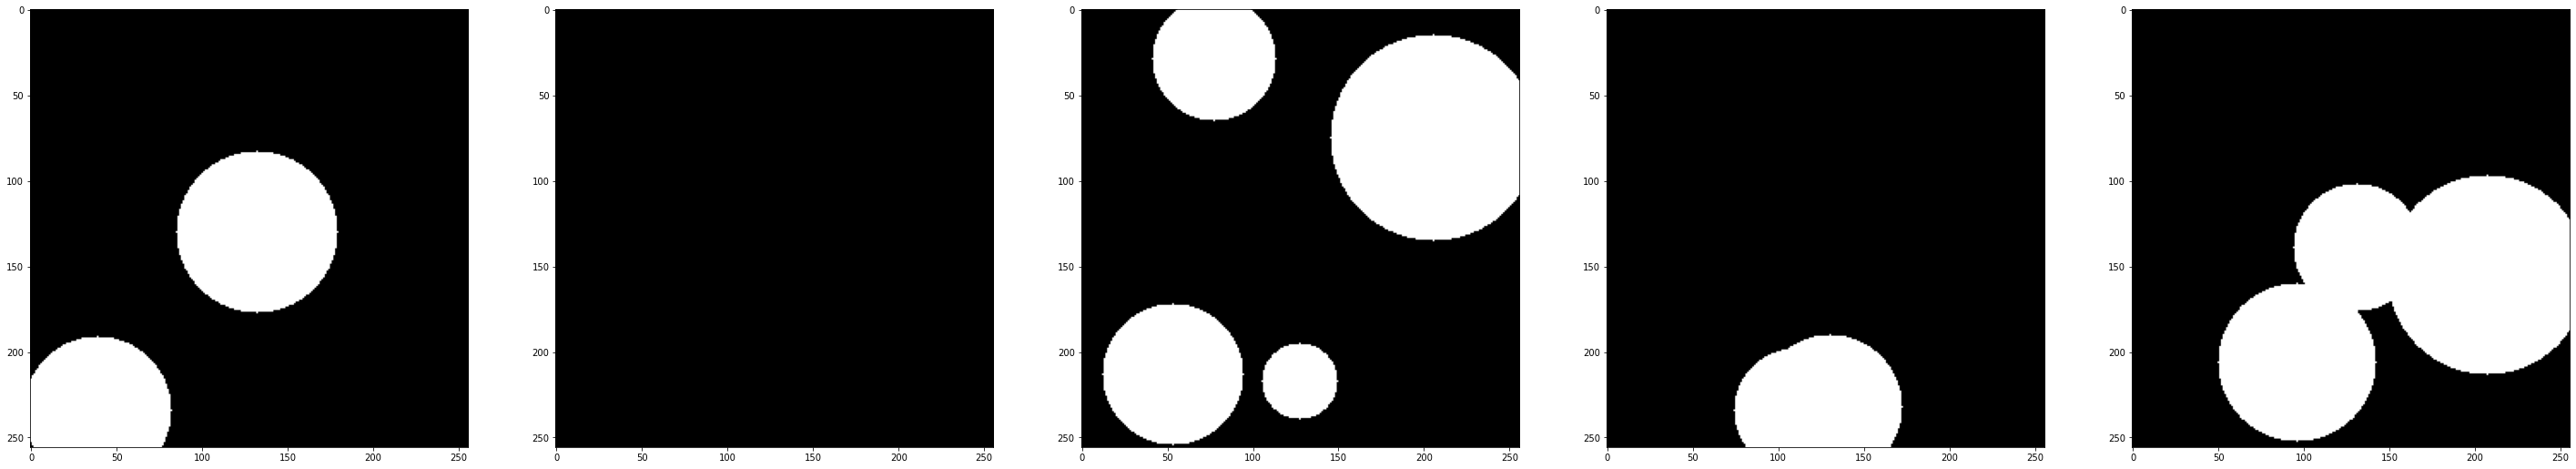

In [189]:
x,y=next(iter(DataLoader(test_dataset,batch_size=5,shuffle=True)))
x_=x.to(device)
pred=model(x_).detach().cpu()

print("original_image :")
show(x.squeeze(dim=1))

after applying cv2.Sobel in x direction :


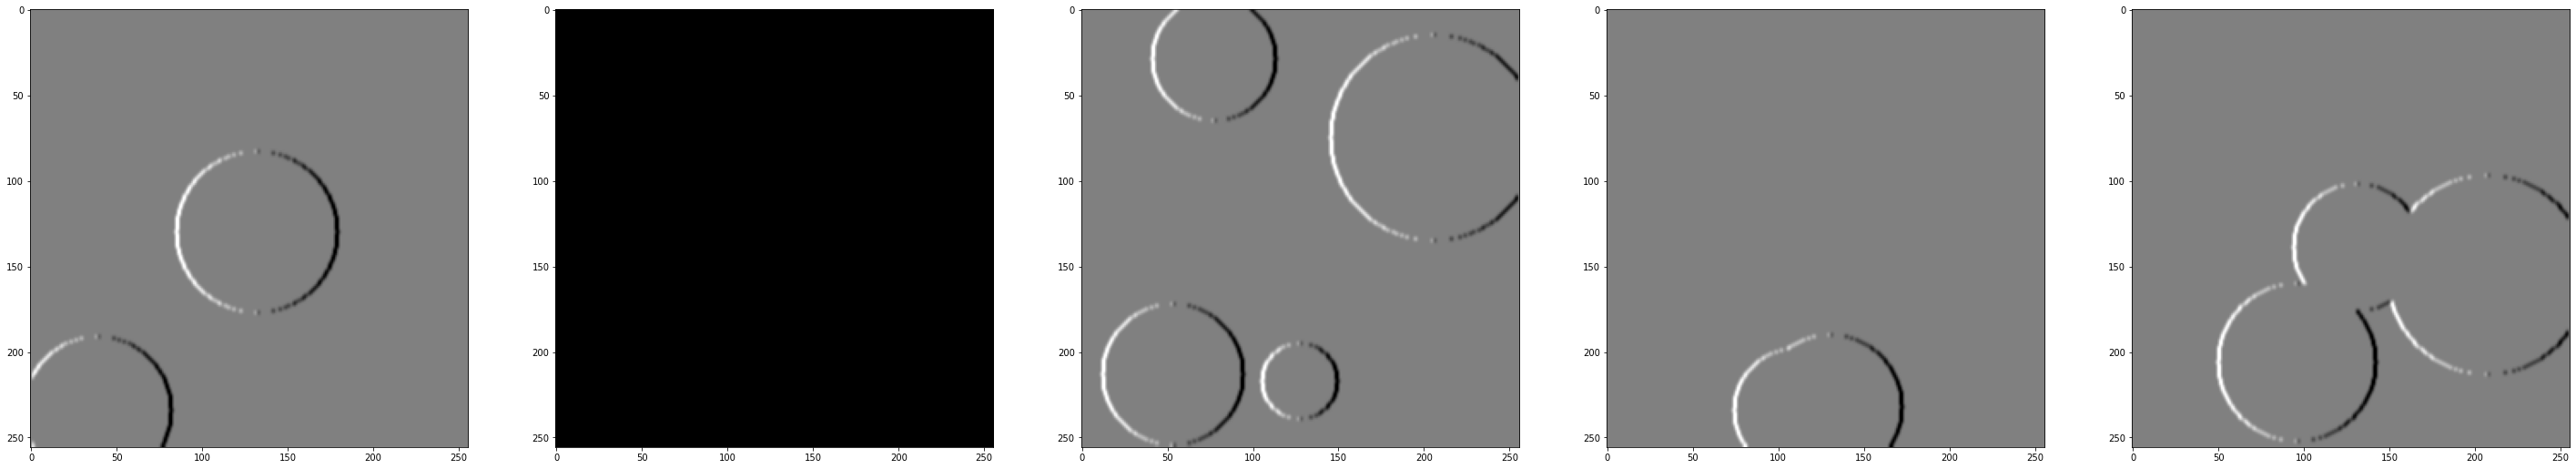

In [190]:
print('after applying cv2.Sobel in x direction :')
show(y.squeeze(dim=1))

output prediction of nueral network :


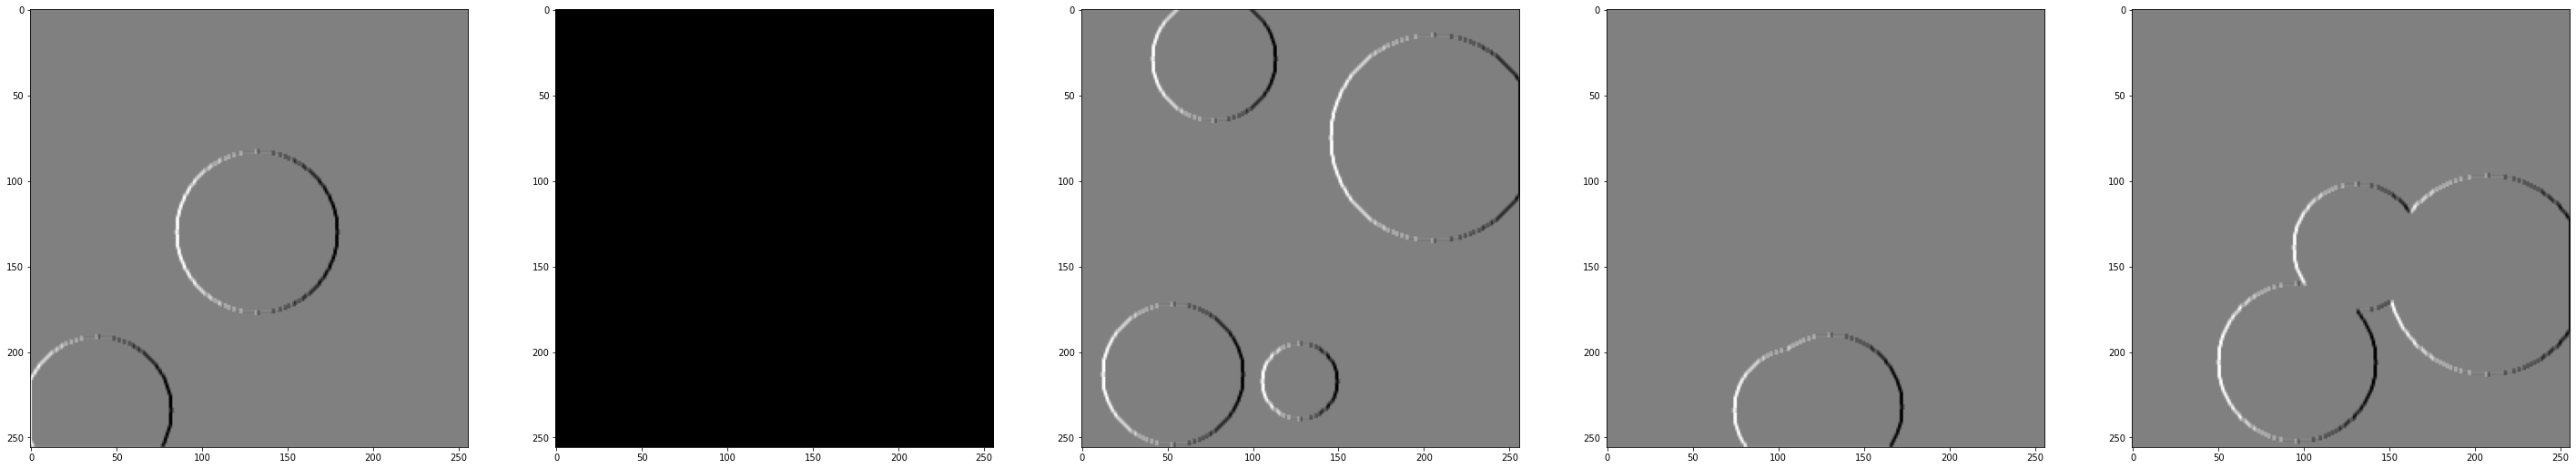

In [191]:
print("output prediction of nueral network :")
show(pred.squeeze(dim=1))

In [197]:
print('learned sobel kernel for x dircetion:')
print(model.conv.weight.data)

learned sobel kernel for x dircetion:
tensor([[[[-1.3869,  0.1535,  1.0591],
          [-1.1234,  0.1495,  1.2966],
          [-1.1491,  0.0089,  0.9782]]]])
